In [16]:
from keras.applications import VGG16
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [37]:
model = VGG16(weights='imagenet',include_top=False)
model1 = VGG16(weights='imagenet')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
  1482752/553467096 [..............................] - ETA: 38:48

KeyboardInterrupt: 

In [3]:
layer_name = 'block3_conv1'
filter_index = 0

In [4]:
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])

In [6]:
grads = K.gradients(loss, model.input)[0]

In [7]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [8]:
iterate = K.function([model.input], [loss, grads])

In [19]:
loss_value, grads_value = iterate([np.zeros((1,150,150,3))])

In [11]:
input_img_data = np.random.random((1,150,150,3))*20 + 128

In [12]:
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    
    input_img_data += grads_value * step

In [13]:
def depracess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x,0,1)
    
    x *=255
    x = np.clip(x,0,255).astype('uint8')
    return x 

In [14]:
def generat_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 +128.
    
    step = 1.
    
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return depracess_image(img)

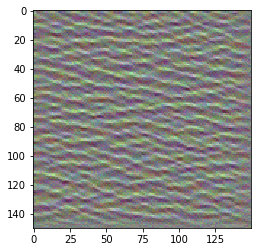

In [23]:
plt.imshow(generat_pattern('block3_conv1', 1))
plt.show()

In [33]:
print(generat_pattern('block3_conv1',1))

[[[125 125 116]
  [133 115 141]
  [104  96 104]
  ...
  [116 148 124]
  [119 120 129]
  [106 132 115]]

 [[123 119 110]
  [149 138 112]
  [120 146 141]
  ...
  [155 141 134]
  [114 150 154]
  [123 124 126]]

 [[148 113 121]
  [140 125  94]
  [114 104 123]
  ...
  [119 111 123]
  [112 135 114]
  [105 114 134]]

 ...

 [[143 153 142]
  [107 132 128]
  [136 121 147]
  ...
  [137 127 127]
  [116 114 116]
  [120 117 122]]

 [[134 128 143]
  [126 100 143]
  [139 107  99]
  ...
  [142 108 110]
  [112 128 131]
  [120 113 150]]

 [[117 111 109]
  [106 140 114]
  [131 124 125]
  ...
  [107 140 113]
  [121 144 112]
  [113 115 115]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


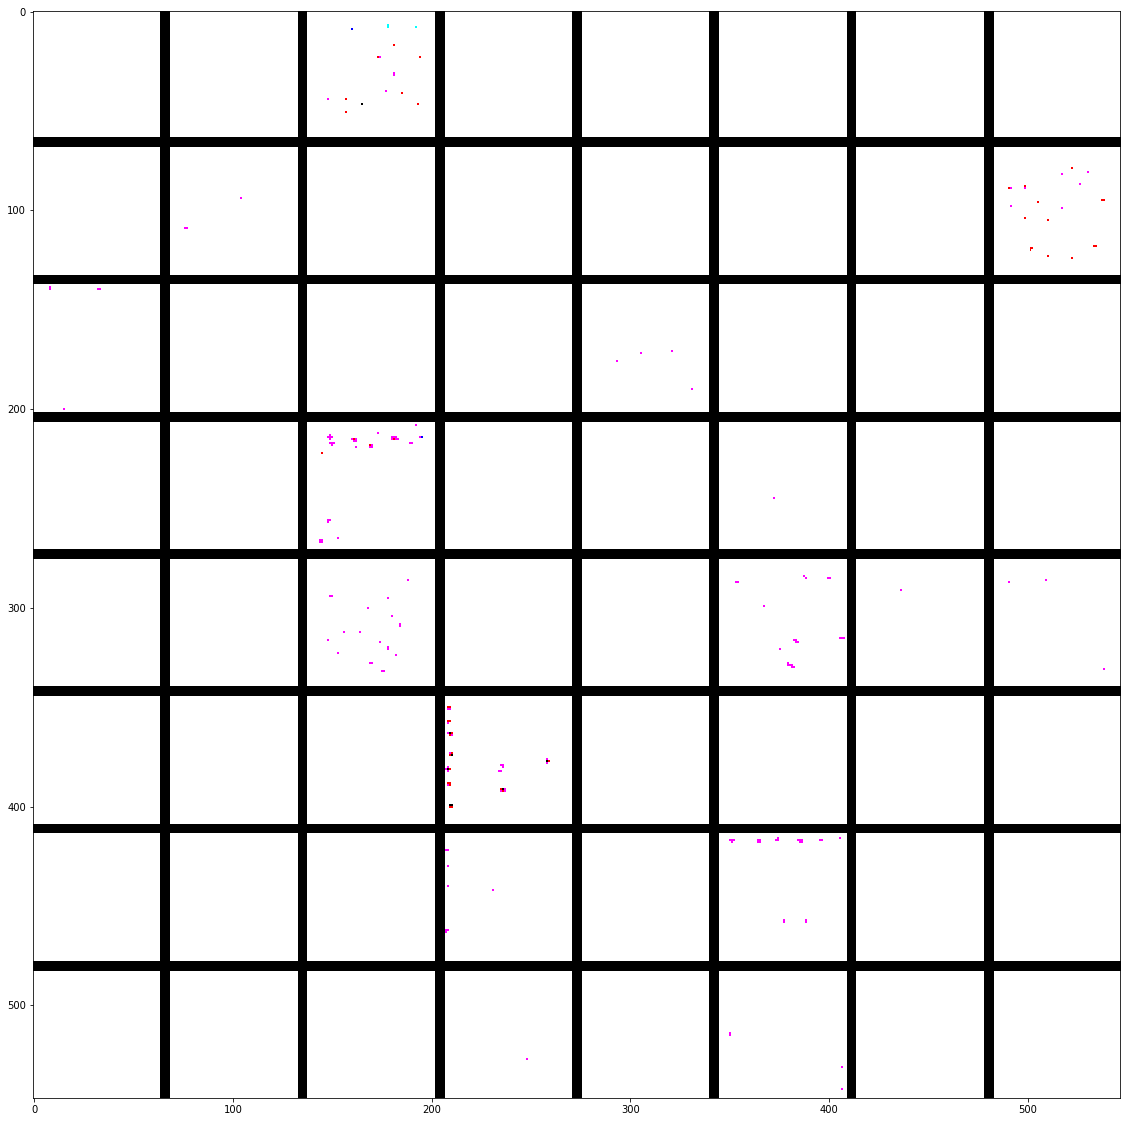

In [28]:
layer_name = 'block3_conv1'
size = 64
margin = 5

results = np.zeros((8 * size +7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generat_pattern(layer_name, i + (j*8), size=size)
        
        horizontal_start = i * size + i*margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j*margin
        vertical_end = vertical_start + size
        results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img
        

plt.figure(figsize=(20,20))
plt.imshow(results)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
[[[124. 129. 126.]
  [125. 134. 125.]
  [123. 132. 130.]
  ...
  [135. 121. 128.]
  [142. 132. 135.]
  [139. 129. 130.]]

 [[138. 146. 136.]
  [142. 143. 145.]
  [127. 133. 127.]
  ...
  [126. 115. 122.]
  [144. 147. 143.]
  [140. 139. 141.]]

 [[130. 138. 142.]
  [131. 135. 132.]
  [118. 114. 111.]
  ...
  [116. 102. 103.]
  [130. 124. 131.]
  [131. 132. 129.]]

 ...

 [[134. 145. 141.]
  [136. 145. 139.]
  [150. 148. 148.]
  ...
  [142. 138. 145.]
  [136. 139. 142.]
  [124. 129. 127.]]

 [[127. 146. 134.]
  [139. 144. 134.]
  [150. 151. 145.]
  ...
  [135. 151. 144.]
  [139. 141. 135.]
  [129. 136. 140.]]

 [[125. 142. 136.]
  [134. 143. 129.]
  [130. 143. 138.]
  ...
  [135. 139. 140.]
  [138. 139. 130.]
  [133. 133. 134.]]]


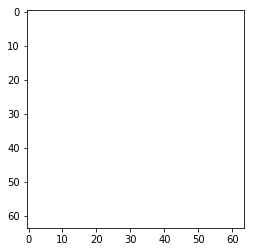

In [36]:
print(results[0:64,0:64].shape)
print(results[0:64,0:64])
plt.imshow(results[0:64,0:64,:])
plt.show()